### Setting up inflection point modeling in Jupyter Notebook rather than CellML

Loading necessary python packages etc

In [77]:
from math import *
from numpy import *
import pandas as pd

Initializing parameters:

make changes to these parameters to change what is used in the model

In [69]:
Vmax_GK = [0.28, 0.30]
gk_params = [-0.22 * 1000, -0.5 * 1000, -7.1 * 1000] # S, H, C in Joules not kJ
Vmax_PGI = [50, 55]
pgi_params = [-0.189 * 1000, -1.7 * 1000, -4.0 * 1000] # S, H, C in Joules not kJ
Vmax_PFK = [0.035, 0.40]
pfk_params = [-0.17 * 1000, 23 * 1000, -1.8 * 1000] # S, H, C in Joules not kJ
Vmax_FBPA = [0.39, 0.45]
fbpa_params = [-0.17 * 1000, 17 * 1000, -1.7 * 1000] # S, H, C in Joules not kJ
Vmax_GAPD = [1.3, 2]
gapd_params = [-0.188 * 1000, 3.0 * 1000, -2.1 * 1000] # S, H, C in Joules not kJ
T = [300, 325]
size(T)
# model(GK_S, GK_H, GK_C, ..., T)

2

This sets up the code to run the function, it should run silently (no warnings/complaints). You just need to run it once before anything below it provided you don't make changes to it.

In [37]:
def glycolysis_6(vmax_GK, vmax_PGI, vmax_PFK, vmax_FBPA, vmax_GAPD, T):
    for i in range(len(T)):

        # Size of variable arrays:
        sizeAlgebraic = 7
        sizeStates = 11
        sizeConstants = 18

        def createLegends():
            legend_states = [""] * sizeStates
            legend_rates = [""] * sizeStates
            legend_algebraic = [""] * sizeAlgebraic
            legend_voi = ""
            legend_constants = [""] * sizeConstants
            legend_VOI = "time in component environment (minute)"
            legend_states[0] = "GLC in component GLC (millimolar)"
            legend_algebraic[3] = "v_GK in component v_GK (flux)"
            legend_states[1] = "G6P in component G6P (millimolar)"
            legend_algebraic[2] = "v_PGI in component v_PGI (flux)"
            legend_states[2] = "F6P in component F6P (millimolar)"
            legend_algebraic[6] = "v_PFK in component v_PFK (flux)"
            legend_states[3] = "FBP in component FBP (millimolar)"
            legend_algebraic[5] = "v_FBPA in component v_FBPA (flux)"
            legend_states[4] = "TRIO in component TRIO (millimolar)"
            legend_algebraic[4] = "v_GAPD in component v_GAPD (flux)"
            legend_states[5] = "BPG in component BPG (millimolar)"
            legend_states[6] = "P in component P (millimolar)"
            legend_states[7] = "NADH in component NADH (millimolar)"
            legend_states[8] = "NAD in component NAD (millimolar)"
            legend_algebraic[1] = "DHAP in component DHAP (millimolar)"
            legend_constants[0] = "Keq_TPI in component DHAP (dimensionless)"
            legend_algebraic[0] = "GAP in component GAP (millimolar)"
            legend_states[9] = "ADP in component ADP (millimolar)"
            legend_states[10] = "ATP in component ATP (millimolar)"
            legend_constants[1] = "K_m_G6P in component v_PGI (millimolar)"
            legend_constants[2] = "V_max in component v_PGI (flux)"
            legend_constants[3] = "Km_GLC in component v_GK (millimolar)"
            legend_constants[4] = "K_hlf_ATP in component v_GK (millimolar)"
            legend_constants[5] = "h_ATP in component v_GK (dimensionless)"
            legend_constants[6] = "v_max in component v_GK (flux)"
            legend_constants[7] = "V_max in component v_GAPD (flux)"
            legend_constants[8] = "Km_GAP in component v_GAPD (millimolar)"
            legend_constants[9] = "Km_NAD in component v_GAPD (millimolar)"
            legend_constants[10] = "Km_P in component v_GAPD (millimolar)"
            legend_constants[11] = "KM_FBP in component v_FBPA (millimolar)"
            legend_constants[12] = "v_max in component v_FBPA (flux)"
            legend_constants[13] = "K_i_FBP in component v_FBPA (millimolar)"
            legend_constants[14] = "v_max in component v_PFK (flux)"
            legend_constants[15] = "K_hlf_F6P in component v_PFK (millimolar)"
            legend_constants[16] = "h_F6P in component v_PFK (dimensionless)"
            legend_constants[17] = "Km_ATP in component v_PFK (millimolar)"
            legend_rates[0] = "d/dt GLC in component GLC (millimolar)"
            legend_rates[1] = "d/dt G6P in component G6P (millimolar)"
            legend_rates[2] = "d/dt F6P in component F6P (millimolar)"
            legend_rates[3] = "d/dt FBP in component FBP (millimolar)"
            legend_rates[4] = "d/dt TRIO in component TRIO (millimolar)"
            legend_rates[5] = "d/dt BPG in component BPG (millimolar)"
            legend_rates[6] = "d/dt P in component P (millimolar)"
            legend_rates[7] = "d/dt NADH in component NADH (millimolar)"
            legend_rates[8] = "d/dt NAD in component NAD (millimolar)"
            legend_rates[9] = "d/dt ADP in component ADP (millimolar)"
            legend_rates[10] = "d/dt ATP in component ATP (millimolar)"
            return (legend_states, legend_algebraic, legend_voi, legend_constants)

        def initConsts():
            constants = [0.0] * sizeConstants; states = [0.0] * sizeStates;
            states[0] = 10 # GLC concentration
            states[1] = 0 # G6P concentration
            states[2] = 0 # F6P concentration
            states[3] = 0 # FBP concentration
            states[4] = 0 # TRIO concentration
            states[5] = 0 # BPG concentration
            states[6] = 100 # P concentration
            states[7] = 0 # NADH concentration
            states[8] = 10 # NAD concentration
            constants[0] = 0.045 # Keq TPI in component DHAP
            states[9] = 0 # ADP concentration
            states[10] = 7 # ATP concentration
            constants[1] = 1.4 # Km G6P in v PGI
            constants[2] = vmax_PGI[i] # Vmax in v PGI -- this got changed at each temperature
            constants[3] = 0.11 # Km GLC in v GK
            constants[4] = 1.7 # Khlf ATP in v GK
            constants[5] = 1.2 # h ATP in v GK
            constants[6] = vmax_GK[i] # vmax in v GK -- this got changed at each temperature
            constants[7] = vmax_GAPD[i] # Vmax in v GAPD -- this got changed at each temperature
            constants[8] = 2.4 # Km GAP in v GAPD
            constants[9] = 0.9 # Km NAD in v GAPD
            constants[10] = 13 # Km P in v GAPD
            constants[11] = 4.4 # Km FBP in v FBPA
            constants[12] = vmax_FBPA[i] # vmax in v FBPA -- this got changed at each temperature
            constants[13] = 10 # Ki FBP in v FBPA
            constants[14] = vmax_PFK[i] # vmax in v PFK -- this got changed at each temperature
            constants[15] = 0.74 # Khlf F6P in v PFK
            constants[16] = 1.7 # h F6P in v PFK
            constants[17] = 1.1 # Km ATP in v PFK
            return (states, constants)

        def computeRates(voi, states, constants):
            rates = [0.0] * sizeStates; algebraic = [0.0] * sizeAlgebraic
            algebraic[3] = (constants[6]*(states[10]**constants[5])*states[0])/((constants[4]**constants[5])*constants[3]+(states[10]**constants[5])*states[0])
            rates[0] = -algebraic[3]
            algebraic[2] = (constants[2]*states[1])/(constants[1]+states[1])
            rates[1] = algebraic[3]-algebraic[2]
            algebraic[0] = (states[4]*constants[0])/(1.00000+constants[0])
            algebraic[4] = (constants[7]*algebraic[0]*states[8]*states[6])/(constants[8]*constants[9]*constants[10]+algebraic[0]*states[8]*states[6])
            rates[5] = algebraic[4]
            rates[6] = -algebraic[4]
            rates[7] = algebraic[4]
            rates[8] = -algebraic[4]
            algebraic[5] = (constants[12]*states[3])/(constants[11]+(states[3]*(1.00000+states[3]))/constants[13])
            rates[4] = 2.00000*algebraic[5]-algebraic[4]
            algebraic[6] = (constants[14]*(states[2]**constants[16])*states[10])/((constants[15]**constants[16])*constants[17]+(states[2]**constants[16])*states[10])
            rates[2] = algebraic[2]-algebraic[6]
            rates[3] = algebraic[6]-algebraic[5]
            rates[9] = algebraic[3]+algebraic[6]
            rates[10] = -(algebraic[3]+algebraic[6])
            return(rates)

        def computeAlgebraic(constants, states, voi):
            algebraic = array([[0.0] * len(voi)] * sizeAlgebraic)
            states = array(states)
            voi = array(voi)
            algebraic[3] = (constants[6]*(states[10]**constants[5])*states[0])/((constants[4]**constants[5])*constants[3]+(states[10]**constants[5])*states[0])
            algebraic[2] = (constants[2]*states[1])/(constants[1]+states[1])
            algebraic[0] = (states[4]*constants[0])/(1.00000+constants[0])
            algebraic[4] = (constants[7]*algebraic[0]*states[8]*states[6])/(constants[8]*constants[9]*constants[10]+algebraic[0]*states[8]*states[6])
            algebraic[5] = (constants[12]*states[3])/(constants[11]+(states[3]*(1.00000+states[3]))/constants[13])
            algebraic[6] = (constants[14]*(states[2]**constants[16])*states[10])/((constants[15]**constants[16])*constants[17]+(states[2]**constants[16])*states[10])
            algebraic[1] = states[4]/(1.00000+constants[0])
            return algebraic

        def solve_model():
            """Solve model with ODE solver"""
            from scipy.integrate import ode
            # Initialise constants and state variables
            (init_states, constants) = initConsts()

            # Set timespan to solve over
            voi = linspace(0, 10, 500)

            # Construct ODE object to solve
            r = ode(computeRates)
            r.set_integrator('vode', method='bdf', atol=1e-006, rtol=1e-006, max_step=1)
            r.set_initial_value(init_states, voi[0])
            r.set_f_params(constants)

            # Solve model
            states = array([[0.0] * len(voi)] * sizeStates)
            states[:,0] = init_states
            for (i,t) in enumerate(voi[1:]):
                if r.successful():
                    r.integrate(t)
                    states[:,i+1] = r.y
                else:
                    break

            # Compute algebraic variables
            algebraic = computeAlgebraic(constants, states, voi)
            return (voi, states, algebraic)

        def plot_model(voi, states, algebraic):
            """Plot variables against variable of integration"""
            import pylab
            (legend_states, legend_algebraic, legend_voi, legend_constants) = createLegends()
            pylab.figure(1)
            pylab.plot(voi,vstack((states,algebraic)).T)
            pylab.xlabel(legend_voi)
            pylab.legend(legend_states + legend_algebraic, loc='best')
            pylab.title("Temperature: " + str(T[i]))
            pylab.show()

        if __name__ == "__main__":
            (voi, states, algebraic) = solve_model()
            plot_model(voi, states, algebraic)

Now we can run the model with the inputs provided.

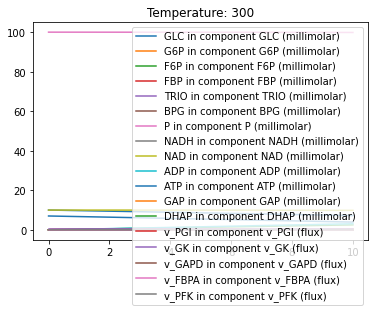

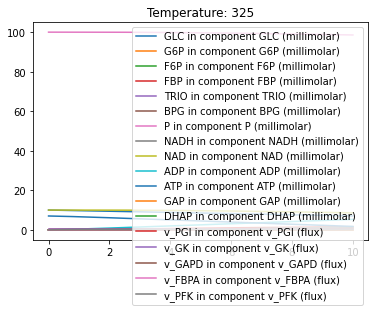

In [36]:
glycolysis_6(Vmax_GK, Vmax_PGI, Vmax_PFK, Vmax_FBPA, Vmax_GAPD, T)

Now let's make a function that calculates the rates using MMRT using S, H, C and T as inputs.

In [68]:
def MMRT(S, H, C, T, T_0 = 310): # T in Kelvin, everything else in Joules!
    kb = 1.380649e-23 # Boltzmann's constant
    h = 6.62607015e-34 # Planck's constant
    R = 8.314 # ideal gas constant, J/K*mol
    vmax = (kb / h) * T * (exp(((-H - C * (T - T_0)) / (R * T)) + ((S + C * (log(T / T_0))) / (R))))
    return vmax

So to test this I'm stealing the GAPD values from the supplemental table (Topt on pg s9). Erica and I eyeballed this against a graph in her thesis and it matches!

In [67]:
log(MMRT(S = -0.188 * 1000, H = 3.0 * 1000, C = -2.1 * 1000, T = 330)) # input S/H/C in J not kJ!

5.369639206968219

In [75]:
def glycolysis_6_MMRT(GK_params, PGI_params, PFK_params, FBPA_params, GAPD_params, T):
    for i in range(len(T)):
        vmax_GK = MMRT(GK_params[0], GK_params[1], GK_params[2], T[i])
        vmax_PGI = MMRT(PGI_params[0], PGI_params[1], PGI_params[2], T[i])
        vmax_PFK = MMRT(PFK_params[0], PFK_params[1], PFK_params[2], T[i])
        vmax_FBPA = MMRT(FBPA_params[0], FBPA_params[1], FBPA_params[2], T[i])
        vmax_GAPD = MMRT(GAPD_params[0], GAPD_params[1], GAPD_params[2], T[i])

        # Size of variable arrays:
        sizeAlgebraic = 7
        sizeStates = 11
        sizeConstants = 18

        def createLegends():
            legend_states = [""] * sizeStates
            legend_rates = [""] * sizeStates
            legend_algebraic = [""] * sizeAlgebraic
            legend_voi = ""
            legend_constants = [""] * sizeConstants
            legend_VOI = "time in component environment (minute)"
            legend_states[0] = "GLC in component GLC (millimolar)"
            legend_algebraic[3] = "v_GK in component v_GK (flux)"
            legend_states[1] = "G6P in component G6P (millimolar)"
            legend_algebraic[2] = "v_PGI in component v_PGI (flux)"
            legend_states[2] = "F6P in component F6P (millimolar)"
            legend_algebraic[6] = "v_PFK in component v_PFK (flux)"
            legend_states[3] = "FBP in component FBP (millimolar)"
            legend_algebraic[5] = "v_FBPA in component v_FBPA (flux)"
            legend_states[4] = "TRIO in component TRIO (millimolar)"
            legend_algebraic[4] = "v_GAPD in component v_GAPD (flux)"
            legend_states[5] = "BPG in component BPG (millimolar)"
            legend_states[6] = "P in component P (millimolar)"
            legend_states[7] = "NADH in component NADH (millimolar)"
            legend_states[8] = "NAD in component NAD (millimolar)"
            legend_algebraic[1] = "DHAP in component DHAP (millimolar)"
            legend_constants[0] = "Keq_TPI in component DHAP (dimensionless)"
            legend_algebraic[0] = "GAP in component GAP (millimolar)"
            legend_states[9] = "ADP in component ADP (millimolar)"
            legend_states[10] = "ATP in component ATP (millimolar)"
            legend_constants[1] = "K_m_G6P in component v_PGI (millimolar)"
            legend_constants[2] = "V_max in component v_PGI (flux)"
            legend_constants[3] = "Km_GLC in component v_GK (millimolar)"
            legend_constants[4] = "K_hlf_ATP in component v_GK (millimolar)"
            legend_constants[5] = "h_ATP in component v_GK (dimensionless)"
            legend_constants[6] = "v_max in component v_GK (flux)"
            legend_constants[7] = "V_max in component v_GAPD (flux)"
            legend_constants[8] = "Km_GAP in component v_GAPD (millimolar)"
            legend_constants[9] = "Km_NAD in component v_GAPD (millimolar)"
            legend_constants[10] = "Km_P in component v_GAPD (millimolar)"
            legend_constants[11] = "KM_FBP in component v_FBPA (millimolar)"
            legend_constants[12] = "v_max in component v_FBPA (flux)"
            legend_constants[13] = "K_i_FBP in component v_FBPA (millimolar)"
            legend_constants[14] = "v_max in component v_PFK (flux)"
            legend_constants[15] = "K_hlf_F6P in component v_PFK (millimolar)"
            legend_constants[16] = "h_F6P in component v_PFK (dimensionless)"
            legend_constants[17] = "Km_ATP in component v_PFK (millimolar)"
            legend_rates[0] = "d/dt GLC in component GLC (millimolar)"
            legend_rates[1] = "d/dt G6P in component G6P (millimolar)"
            legend_rates[2] = "d/dt F6P in component F6P (millimolar)"
            legend_rates[3] = "d/dt FBP in component FBP (millimolar)"
            legend_rates[4] = "d/dt TRIO in component TRIO (millimolar)"
            legend_rates[5] = "d/dt BPG in component BPG (millimolar)"
            legend_rates[6] = "d/dt P in component P (millimolar)"
            legend_rates[7] = "d/dt NADH in component NADH (millimolar)"
            legend_rates[8] = "d/dt NAD in component NAD (millimolar)"
            legend_rates[9] = "d/dt ADP in component ADP (millimolar)"
            legend_rates[10] = "d/dt ATP in component ATP (millimolar)"
            return (legend_states, legend_algebraic, legend_voi, legend_constants)

        def initConsts():
            constants = [0.0] * sizeConstants; states = [0.0] * sizeStates;
            states[0] = 10 # GLC concentration
            states[1] = 0 # G6P concentration
            states[2] = 0 # F6P concentration
            states[3] = 0 # FBP concentration
            states[4] = 0 # TRIO concentration
            states[5] = 0 # BPG concentration
            states[6] = 100 # P concentration
            states[7] = 0 # NADH concentration
            states[8] = 10 # NAD concentration
            constants[0] = 0.045 # Keq TPI in component DHAP
            states[9] = 0 # ADP concentration
            states[10] = 7 # ATP concentration
            constants[1] = 1.4 # Km G6P in v PGI
            constants[2] = vmax_PGI # Vmax in v PGI -- this got changed at each temperature
            constants[3] = 0.11 # Km GLC in v GK
            constants[4] = 1.7 # Khlf ATP in v GK
            constants[5] = 1.2 # h ATP in v GK
            constants[6] = vmax_GK # vmax in v GK -- this got changed at each temperature
            constants[7] = vmax_GAPD # Vmax in v GAPD -- this got changed at each temperature
            constants[8] = 2.4 # Km GAP in v GAPD
            constants[9] = 0.9 # Km NAD in v GAPD
            constants[10] = 13 # Km P in v GAPD
            constants[11] = 4.4 # Km FBP in v FBPA
            constants[12] = vmax_FBPA # vmax in v FBPA -- this got changed at each temperature
            constants[13] = 10 # Ki FBP in v FBPA
            constants[14] = vmax_PFK # vmax in v PFK -- this got changed at each temperature
            constants[15] = 0.74 # Khlf F6P in v PFK
            constants[16] = 1.7 # h F6P in v PFK
            constants[17] = 1.1 # Km ATP in v PFK
            return (states, constants)

        def computeRates(voi, states, constants):
            rates = [0.0] * sizeStates; algebraic = [0.0] * sizeAlgebraic
            algebraic[3] = (constants[6]*(states[10]**constants[5])*states[0])/((constants[4]**constants[5])*constants[3]+(states[10]**constants[5])*states[0])
            rates[0] = -algebraic[3]
            algebraic[2] = (constants[2]*states[1])/(constants[1]+states[1])
            rates[1] = algebraic[3]-algebraic[2]
            algebraic[0] = (states[4]*constants[0])/(1.00000+constants[0])
            algebraic[4] = (constants[7]*algebraic[0]*states[8]*states[6])/(constants[8]*constants[9]*constants[10]+algebraic[0]*states[8]*states[6])
            rates[5] = algebraic[4]
            rates[6] = -algebraic[4]
            rates[7] = algebraic[4]
            rates[8] = -algebraic[4]
            algebraic[5] = (constants[12]*states[3])/(constants[11]+(states[3]*(1.00000+states[3]))/constants[13])
            rates[4] = 2.00000*algebraic[5]-algebraic[4]
            algebraic[6] = (constants[14]*(states[2]**constants[16])*states[10])/((constants[15]**constants[16])*constants[17]+(states[2]**constants[16])*states[10])
            rates[2] = algebraic[2]-algebraic[6]
            rates[3] = algebraic[6]-algebraic[5]
            rates[9] = algebraic[3]+algebraic[6]
            rates[10] = -(algebraic[3]+algebraic[6])
            return(rates)

        def computeAlgebraic(constants, states, voi):
            algebraic = array([[0.0] * len(voi)] * sizeAlgebraic)
            states = array(states)
            voi = array(voi)
            algebraic[3] = (constants[6]*(states[10]**constants[5])*states[0])/((constants[4]**constants[5])*constants[3]+(states[10]**constants[5])*states[0])
            algebraic[2] = (constants[2]*states[1])/(constants[1]+states[1])
            algebraic[0] = (states[4]*constants[0])/(1.00000+constants[0])
            algebraic[4] = (constants[7]*algebraic[0]*states[8]*states[6])/(constants[8]*constants[9]*constants[10]+algebraic[0]*states[8]*states[6])
            algebraic[5] = (constants[12]*states[3])/(constants[11]+(states[3]*(1.00000+states[3]))/constants[13])
            algebraic[6] = (constants[14]*(states[2]**constants[16])*states[10])/((constants[15]**constants[16])*constants[17]+(states[2]**constants[16])*states[10])
            algebraic[1] = states[4]/(1.00000+constants[0])
            return algebraic

        def solve_model():
            """Solve model with ODE solver"""
            from scipy.integrate import ode
            # Initialise constants and state variables
            (init_states, constants) = initConsts()

            # Set timespan to solve over
            voi = linspace(0, 10, 500)

            # Construct ODE object to solve
            r = ode(computeRates)
            r.set_integrator('vode', method='bdf', atol=1e-006, rtol=1e-006, max_step=1)
            r.set_initial_value(init_states, voi[0])
            r.set_f_params(constants)

            # Solve model
            states = array([[0.0] * len(voi)] * sizeStates)
            states[:,0] = init_states
            for (i,t) in enumerate(voi[1:]):
                if r.successful():
                    r.integrate(t)
                    states[:,i+1] = r.y
                else:
                    break

            # Compute algebraic variables
            algebraic = computeAlgebraic(constants, states, voi)
            return (voi, states, algebraic)

        def plot_model(voi, states, algebraic):
            """Plot variables against variable of integration"""
            import pylab
            (legend_states, legend_algebraic, legend_voi, legend_constants) = createLegends()
            pylab.figure(1)
            pylab.plot(voi,vstack((states,algebraic)).T)
            pylab.xlabel(legend_voi)
            # pylab.legend(legend_states + legend_algebraic, loc='best')
            pylab.title("Temperature: " + str(T[i]))
            pylab.show()

        if __name__ == "__main__":
            (voi, states, algebraic) = solve_model()
            plot_model(voi, states, algebraic)

Ok so let's test this with the parameter info for each enzyme that I put in above

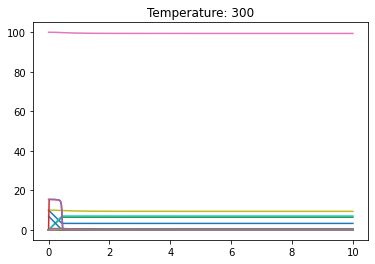

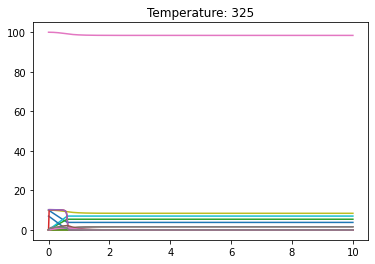

In [76]:
glycolysis_6_MMRT(gk_params, pgi_params, pfk_params, fbpa_params, gapd_params, T)

Let's change this to give some more useful outputs, maybe a datatable of some sort?

Probably the best method would be convert all the gobbldigook above into pandas
- this is in progress, so far I have eliminated the unlabeled constants


In [185]:
def glycolysis_6_MMRT_pandas(GK_params, PGI_params, PFK_params, FBPA_params, GAPD_params, T):
    # Size of variable arrays:
    sizeAlgebraic = 7
    sizeStates = 11
    
    # Initialize output array:
    out_list = zeros(shape=(len(T), sizeStates))
        
    for i in range(0,len(T)):
        vmax_GK = MMRT(GK_params[0], GK_params[1], GK_params[2], T[i])
        vmax_PGI = MMRT(PGI_params[0], PGI_params[1], PGI_params[2], T[i])
        vmax_PFK = MMRT(PFK_params[0], PFK_params[1], PFK_params[2], T[i])
        vmax_FBPA = MMRT(FBPA_params[0], FBPA_params[1], FBPA_params[2], T[i])
        vmax_GAPD = MMRT(GAPD_params[0], GAPD_params[1], GAPD_params[2], T[i])
        
        # Defining the constants
        Keq_TPI = 0.045 # Keq TPI in component DHAP
        Km_G6P = 1.4 # Km G6P in v PGI
        Km_GLC = 0.11 # Km GLC in v GK
        Khlf_ATP = 1.7 # Khlf ATP in v GK
        h_ATP = 1.2 # h ATP in v GK
        Km_GAP = 2.4 # Km GAP in v GAPD
        Km_NAD = 0.9 # Km NAD in v GAPD
        Km_P = 13 # Km P in v GAPD
        Km_FBP = 4.4 # Km FBP in v FBPA
        Ki_FBP = 10 # Ki FBP in v FBPA
        Khlf_F6P = 0.74 # Khlf F6P in v PFK
        h_F6P = 1.7 # h F6P in v PFK
        Km_ATP = 1.1 # Km ATP in v PFK
        
        # Setting up the names for the output dataframe
        state_cols = ["GLC", "G6P", "F6P", "FBP", "TRIO", "BPG", "P", "NADH", "NAD", "ADP", "ATP"]
        
        def initConsts():
            states = [0.0] * sizeStates;
            states[0] = 10 # GLC concentration
            states[1] = 0 # G6P concentration
            states[2] = 0 # F6P concentration
            states[3] = 0 # FBP concentration
            states[4] = 0 # TRIO concentration
            states[5] = 0 # BPG concentration
            states[6] = 100 # P concentration
            states[7] = 0 # NADH concentration
            states[8] = 10 # NAD concentration
            states[9] = 0 # ADP concentration
            states[10] = 7 # ATP concentration
            return (states)

        def computeRates(voi, states):
            rates = [0.0] * sizeStates; algebraic = [0.0] * sizeAlgebraic
            algebraic[3] = (vmax_GK * (states[10] ** h_ATP)*states[0])/((Khlf_ATP ** h_ATP) * Km_GLC + (states[10]** h_ATP)*states[0])
            rates[0] = -algebraic[3]
            algebraic[2] = (vmax_PGI * states[1])/(Km_G6P + states[1])
            rates[1] = algebraic[3]-algebraic[2]
            algebraic[0] = (states[4]* Keq_TPI)/(1.00000+ Keq_TPI)
            algebraic[4] = (vmax_GAPD * algebraic[0]*states[8]*states[6])/(Km_GAP * Km_NAD * Km_P + algebraic[0]*states[8]*states[6])
            rates[5] = algebraic[4]
            rates[6] = -algebraic[4]
            rates[7] = algebraic[4]
            rates[8] = -algebraic[4]
            algebraic[5] = (vmax_FBPA * states[3])/(Km_FBP + (states[3]*(1.00000+states[3]))/ Ki_FBP)
            rates[4] = 2.00000*algebraic[5]-algebraic[4]
            algebraic[6] = (vmax_PFK * (states[2]** h_F6P)*states[10])/((Khlf_F6P ** h_F6P)* Km_ATP + (states[2]** h_F6P)*states[10])
            rates[2] = algebraic[2]-algebraic[6]
            rates[3] = algebraic[6]-algebraic[5]
            rates[9] = algebraic[3]+algebraic[6]
            rates[10] = -(algebraic[3]+algebraic[6])
            return(rates)

        def computeAlgebraic(states, voi):
            algebraic = array([[0.0] * len(voi)] * sizeAlgebraic)
            states = array(states)
            voi = array(voi)
            algebraic[3] = (vmax_GK * (states[10]** h_ATP)*states[0])/((Khlf_ATP ** h_ATP) * Km_GLC + (states[10]** h_ATP)*states[0])
            algebraic[2] = (vmax_PGI * states[1])/(Km_G6P + states[1])
            algebraic[0] = (states[4]* Keq_TPI)/(1.00000+ Keq_TPI)
            algebraic[4] = (vmax_GAPD * algebraic[0]*states[8]*states[6])/(Km_GAP * Km_NAD * Km_P + algebraic[0]*states[8]*states[6])
            algebraic[5] = (vmax_FBPA * states[3])/(Km_FBP + (states[3]*(1.00000+states[3])) / Ki_FBP)
            algebraic[6] = (vmax_PFK * (states[2]** h_F6P)*states[10])/((Khlf_F6P ** h_F6P)* Km_ATP + (states[2]** h_F6P)*states[10])
            algebraic[1] = states[4]/(1.00000+ Keq_TPI)
            return algebraic

        def solve_model():
            """Solve model with ODE solver"""
            from scipy.integrate import ode
            # Initialise constants and state variables
            (init_states) = initConsts()

            # Set timespan to solve over
            voi = linspace(0, 10, 500)

            # Construct ODE object to solve
            r = ode(computeRates)
            r.set_integrator('vode', method='bdf', atol=1e-006, rtol=1e-006, max_step=1)
            r.set_initial_value(init_states, voi[0])
            #r.set_f_params(constants)

            # Solve model
            states = array([[0.0] * len(voi)] * sizeStates)
            states[:,0] = init_states
            for (i,t) in enumerate(voi[1:]):
                if r.successful():
                    r.integrate(t)
                    states[:,i+1] = r.y
                else:
                    break

            # Compute algebraic variables
            algebraic = computeAlgebraic(states, voi)
            return (voi, states, algebraic)

        if __name__ == "__main__":
            (voi, states, algebraic) = solve_model()
            output = [row[-1] for row in states]
            #df = pd.DataFrame(transpose(states), columns = state_cols)
            #output = df.iloc[[-1]]
            out_list[i,:] = output
            #print(output)
    #outputs = array(out_list)
    df = pd.DataFrame(out_list, columns = state_cols)
    df.insert(0, "Temp", T)
    return df

In [186]:
glycolysis_6_MMRT_pandas(gk_params, pgi_params, pfk_params, fbpa_params, gapd_params, T)

,Temp,GLC,G6P,F6P,FBP,TRIO,BPG,P,NADH,NAD,ADP,ATP
0,300,3.300738,7.115442e-08,6.398523,5.187732e-09,5.402328e-11,0.601477,99.398523,0.601477,9.398523,7.0,1.794072e-111
1,325,3.796788,1.035903e-07,5.406424,2.457258e-13,4.589483e-15,1.593576,98.406424,1.593576,8.406424,7.0,8.681737e-155


Long winded notes on my approach/plan to convert the original code (below) into something more helpful.

To do:
- change from unnamed constants saved in a long list into named constants so it is easier to see what is happening
    - this is going to be annoying b/c the constants were exported without names.....
- adapt plotting to work from list of parameter options instead of needing to run each parameter value separately

This may be of interest in the future: https://kinetics.readthedocs.io/en/latest/index.html

### Original Python code generated by CellML from Prentice 2020: https://models.cellml.org/workspace/5fb/file/a2c9be2ef836d59aea1c30c69b172b76a24c8b06/Prentice%20at%20al.%20The%20Inflection%20Point%20Hypothesis.cellml

The full model from Teusink is here: https://models.cellml.org/e/72/teusink_passarge_reijenga_esgalhado_vanderweijden_schepper_walsh_bakker_vandam_westerhoff_snoep_2000.cellml/view It is essentially the same but with a larger network of reactions.

This at least (sometimes) generates a plot, not a pretty plot, but it is something.

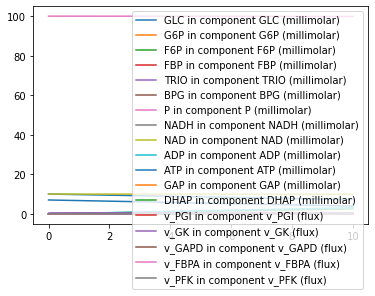

In [4]:
# Size of variable arrays:
sizeAlgebraic = 7
sizeStates = 11
sizeConstants = 18
from math import *
from numpy import *

def createLegends():
    legend_states = [""] * sizeStates
    legend_rates = [""] * sizeStates
    legend_algebraic = [""] * sizeAlgebraic
    legend_voi = ""
    legend_constants = [""] * sizeConstants
    legend_VOI = "time in component environment (minute)"
    legend_states[0] = "GLC in component GLC (millimolar)"
    legend_algebraic[3] = "v_GK in component v_GK (flux)"
    legend_states[1] = "G6P in component G6P (millimolar)"
    legend_algebraic[2] = "v_PGI in component v_PGI (flux)"
    legend_states[2] = "F6P in component F6P (millimolar)"
    legend_algebraic[6] = "v_PFK in component v_PFK (flux)"
    legend_states[3] = "FBP in component FBP (millimolar)"
    legend_algebraic[5] = "v_FBPA in component v_FBPA (flux)"
    legend_states[4] = "TRIO in component TRIO (millimolar)"
    legend_algebraic[4] = "v_GAPD in component v_GAPD (flux)"
    legend_states[5] = "BPG in component BPG (millimolar)"
    legend_states[6] = "P in component P (millimolar)"
    legend_states[7] = "NADH in component NADH (millimolar)"
    legend_states[8] = "NAD in component NAD (millimolar)"
    legend_algebraic[1] = "DHAP in component DHAP (millimolar)"
    legend_constants[0] = "Keq_TPI in component DHAP (dimensionless)"
    legend_algebraic[0] = "GAP in component GAP (millimolar)"
    legend_states[9] = "ADP in component ADP (millimolar)"
    legend_states[10] = "ATP in component ATP (millimolar)"
    legend_constants[1] = "K_m_G6P in component v_PGI (millimolar)"
    legend_constants[2] = "V_max in component v_PGI (flux)"
    legend_constants[3] = "Km_GLC in component v_GK (millimolar)"
    legend_constants[4] = "K_hlf_ATP in component v_GK (millimolar)"
    legend_constants[5] = "h_ATP in component v_GK (dimensionless)"
    legend_constants[6] = "v_max in component v_GK (flux)"
    legend_constants[7] = "V_max in component v_GAPD (flux)"
    legend_constants[8] = "Km_GAP in component v_GAPD (millimolar)"
    legend_constants[9] = "Km_NAD in component v_GAPD (millimolar)"
    legend_constants[10] = "Km_P in component v_GAPD (millimolar)"
    legend_constants[11] = "KM_FBP in component v_FBPA (millimolar)"
    legend_constants[12] = "v_max in component v_FBPA (flux)"
    legend_constants[13] = "K_i_FBP in component v_FBPA (millimolar)"
    legend_constants[14] = "v_max in component v_PFK (flux)"
    legend_constants[15] = "K_hlf_F6P in component v_PFK (millimolar)"
    legend_constants[16] = "h_F6P in component v_PFK (dimensionless)"
    legend_constants[17] = "Km_ATP in component v_PFK (millimolar)"
    legend_rates[0] = "d/dt GLC in component GLC (millimolar)"
    legend_rates[1] = "d/dt G6P in component G6P (millimolar)"
    legend_rates[2] = "d/dt F6P in component F6P (millimolar)"
    legend_rates[3] = "d/dt FBP in component FBP (millimolar)"
    legend_rates[4] = "d/dt TRIO in component TRIO (millimolar)"
    legend_rates[5] = "d/dt BPG in component BPG (millimolar)"
    legend_rates[6] = "d/dt P in component P (millimolar)"
    legend_rates[7] = "d/dt NADH in component NADH (millimolar)"
    legend_rates[8] = "d/dt NAD in component NAD (millimolar)"
    legend_rates[9] = "d/dt ADP in component ADP (millimolar)"
    legend_rates[10] = "d/dt ATP in component ATP (millimolar)"
    return (legend_states, legend_algebraic, legend_voi, legend_constants)

def initConsts():
    constants = [0.0] * sizeConstants; states = [0.0] * sizeStates;
    states[0] = 10 # GLC concentration
    states[1] = 0 # G6P concentration
    states[2] = 0 # F6P concentration
    states[3] = 0 # FBP concentration
    states[4] = 0 # TRIO concentration
    states[5] = 0 # BPG concentration
    states[6] = 100 # P concentration
    states[7] = 0 # NADH concentration
    states[8] = 10 # NAD concentration
    constants[0] = 0.045 # Keq TPI in component DHAP
    states[9] = 0 # ADP concentration
    states[10] = 7 # ATP concentration
    constants[1] = 1.4 # Km G6P in v PGI
    constants[2] = 50 # Vmax in v PGI -- this got changed at each temperature
    constants[3] = 0.11 # Km GLC in v GK
    constants[4] = 1.7 # Khlf ATP in v GK
    constants[5] = 1.2 # h ATP in v GK
    constants[6] = 0.28 # vmax in v GK -- this got changed at each temperature
    constants[7] = 1.3 # Vmax in v GAPD -- this got changed at each temperature
    constants[8] = 2.4 # Km GAP in v GAPD
    constants[9] = 0.9 # Km NAD in v GAPD
    constants[10] = 13 # Km P in v GAPD
    constants[11] = 4.4 # Km FBP in v FBPA
    constants[12] = 0.39 # vmax in v FBPA -- this got changed at each temperature
    constants[13] = 10 # Ki FBP in v FBPA
    constants[14] = 0.035 # vmax in v PFK -- this got changed at each temperature
    constants[15] = 0.74 # Khlf F6P in v PFK
    constants[16] = 1.7 # h F6P in v PFK
    constants[17] = 1.1 # Km ATP in v PFK
    return (states, constants)

def computeRates(voi, states, constants):
    rates = [0.0] * sizeStates; algebraic = [0.0] * sizeAlgebraic
    algebraic[3] = (constants[6]*(states[10]**constants[5])*states[0])/((constants[4]**constants[5])*constants[3]+(states[10]**constants[5])*states[0])
    rates[0] = -algebraic[3]
    algebraic[2] = (constants[2]*states[1])/(constants[1]+states[1])
    rates[1] = algebraic[3]-algebraic[2]
    algebraic[0] = (states[4]*constants[0])/(1.00000+constants[0])
    algebraic[4] = (constants[7]*algebraic[0]*states[8]*states[6])/(constants[8]*constants[9]*constants[10]+algebraic[0]*states[8]*states[6])
    rates[5] = algebraic[4]
    rates[6] = -algebraic[4]
    rates[7] = algebraic[4]
    rates[8] = -algebraic[4]
    algebraic[5] = (constants[12]*states[3])/(constants[11]+(states[3]*(1.00000+states[3]))/constants[13])
    rates[4] = 2.00000*algebraic[5]-algebraic[4]
    algebraic[6] = (constants[14]*(states[2]**constants[16])*states[10])/((constants[15]**constants[16])*constants[17]+(states[2]**constants[16])*states[10])
    rates[2] = algebraic[2]-algebraic[6]
    rates[3] = algebraic[6]-algebraic[5]
    rates[9] = algebraic[3]+algebraic[6]
    rates[10] = -(algebraic[3]+algebraic[6])
    return(rates)

def computeAlgebraic(constants, states, voi):
    algebraic = array([[0.0] * len(voi)] * sizeAlgebraic)
    states = array(states)
    voi = array(voi)
    algebraic[3] = (constants[6]*(states[10]**constants[5])*states[0])/((constants[4]**constants[5])*constants[3]+(states[10]**constants[5])*states[0])
    algebraic[2] = (constants[2]*states[1])/(constants[1]+states[1])
    algebraic[0] = (states[4]*constants[0])/(1.00000+constants[0])
    algebraic[4] = (constants[7]*algebraic[0]*states[8]*states[6])/(constants[8]*constants[9]*constants[10]+algebraic[0]*states[8]*states[6])
    algebraic[5] = (constants[12]*states[3])/(constants[11]+(states[3]*(1.00000+states[3]))/constants[13])
    algebraic[6] = (constants[14]*(states[2]**constants[16])*states[10])/((constants[15]**constants[16])*constants[17]+(states[2]**constants[16])*states[10])
    algebraic[1] = states[4]/(1.00000+constants[0])
    return algebraic

def solve_model():
    """Solve model with ODE solver"""
    from scipy.integrate import ode
    # Initialise constants and state variables
    (init_states, constants) = initConsts()

    # Set timespan to solve over
    voi = linspace(0, 10, 500)

    # Construct ODE object to solve
    r = ode(computeRates)
    r.set_integrator('vode', method='bdf', atol=1e-006, rtol=1e-006, max_step=1)
    r.set_initial_value(init_states, voi[0])
    r.set_f_params(constants)

    # Solve model
    states = array([[0.0] * len(voi)] * sizeStates)
    states[:,0] = init_states
    for (i,t) in enumerate(voi[1:]):
        if r.successful():
            r.integrate(t)
            states[:,i+1] = r.y
        else:
            break

    # Compute algebraic variables
    algebraic = computeAlgebraic(constants, states, voi)
    return (voi, states, algebraic)

def plot_model(voi, states, algebraic):
    """Plot variables against variable of integration"""
    import pylab
    (legend_states, legend_algebraic, legend_voi, legend_constants) = createLegends()
    pylab.figure(1)
    pylab.plot(voi,vstack((states,algebraic)).T)
    pylab.xlabel(legend_voi)
    pylab.legend(legend_states + legend_algebraic, loc='best')
    pylab.show()

if __name__ == "__main__":
    (voi, states, algebraic) = solve_model()
    plot_model(voi, states, algebraic)


C:\Users\Jen\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1009: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  self.messages.get(istate, unexpected_istate_msg)))


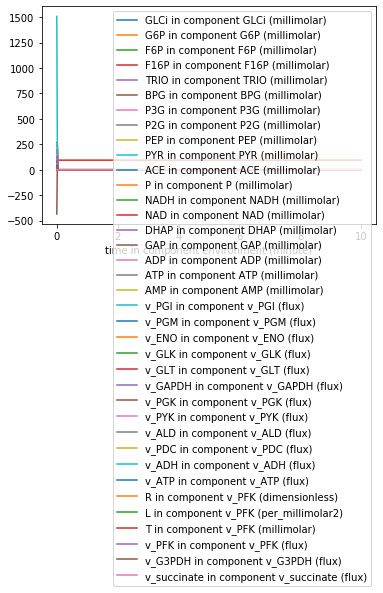